In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Trabalho Pratico 2
*Vitor Hugo - 3049*
*Jose Gregorio - 3046*

### Neste Trabalho foi realizado a limpeza e tratamento dos dados da tabela que srá usada para realizar futuras análises e responder as perguntas realizadas na primeira parte do trabalho. A tabela encontra-se no sheet TimeSeries_1971-2019 do excel WorldEnergyBalancesHighlights_final.xlsx, essa tabela contém dados sobre a distribuição e consumo das matrizes energéticas de 30 países entre os anos de 1971 até 2019, além disso essa tabela agrupa os dados entres os continentes e o mundo.

### Os dados a possuem um index para melhor entendimento
[a relative link](indexes_IEA.md)

## Leitura

In [2]:
xls = pd.ExcelFile('WorldEnergyBalancesHighlights_final.xlsx')

## Selecionando tabela e Limpando dados
- O header foi atribuido a linha de numero 2(index 1 da tabela no pandas)
- Os indexes foram atribuidos paras três primeiras colunas
- Foi selecionado somente as colunas que continha valores validos e iriam ser analisadas
- Foi removido as colunas referente aos anos de 1971-1989, 2019, pois não havião dados para todos os Países
- Foi tratado como Nan valores '..' : Não há dados e 'c' : confidencial, foi preciso tratar esse dados como Nan para poder tratar os tipos das colunas como float64

In [3]:
df = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
df

1990  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.061030e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -6.726662e+04   
                                                                 Total energy supply (ktoe)               3.488774e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.892349e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.046845e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.501510e+06   
                                        Nuclear                  Electricity output (GWh)                 2.012902e+06   
                                        Renewable sources        Electricity output (GWh)                 2.296008e+06   
                                        Total                    Electricity output (GWh)                 1.184619e+07   

                                                                                                                  1991  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.147629e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -7.821431e+04   
                                                                 Total energy supply (ktoe)               3.627799e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.994731e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.328546e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.635090e+06   
                                        Nuclear                  Electricity output (GWh)                 2.105787e+06   
                                        Renewable sources        Electricity output (GWh)                 2.331754e+06   
                                        Total                    Electricity output (GWh)                 1.211372e+07   

                                                                                                                  1992  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.191394e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -8.201214e+04   
                                                                 Total energy supply (ktoe)               3.683188e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -3.072018e+04   
...                                                                                   

In [4]:
countries = [
"Australia",
"Austria",
"Belgium",
"Canada",
"Chile",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Japan",
"Korea",
"Latvia",
"Lithuania",
"Luxembourg",
"Mexico",
"Netherlands",
"New Zealand",
"Norway",
"Poland",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"United Kingdom",
"United States",
"Brazil",
"People's Republic of China",
"India",
"Indonesia",
"Morocco",
"Singapore",
"South Africa",
"Thailand"]

In [5]:
asia = [
"Japan",
"Korea",
"People's Republic of China",
"India",
"Indonesia",
"Singapore",
"Thailand"
]

oceania= [
"Australia",
"New Zealand"]

america= [
"Canada",
"Chile",
"Mexico",
"United States",
"Brazil",
]

europa= [
"Austria",
"Belgium",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Latvia",
"Lithuania",
"Luxembourg",
"Netherlands",
"New Zealand",
"Norway",
"Poland",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"United Kingdom",]

In [6]:
br = df.loc[('Brazil')]
br.to_csv('br.csv')

In [7]:
total:pd.DataFrame = br.loc[('Total')].iloc[6:12].transpose()
years= total.index.tolist()

In [8]:
def commanPlot(obj,list_year=years):
    obj.plot(figsize=(15,10))
    plt.xticks(list_year)
    plt.xticks(rotation=90)
    plt.show()


### Algumas informações sobre o total de consumo no brasil

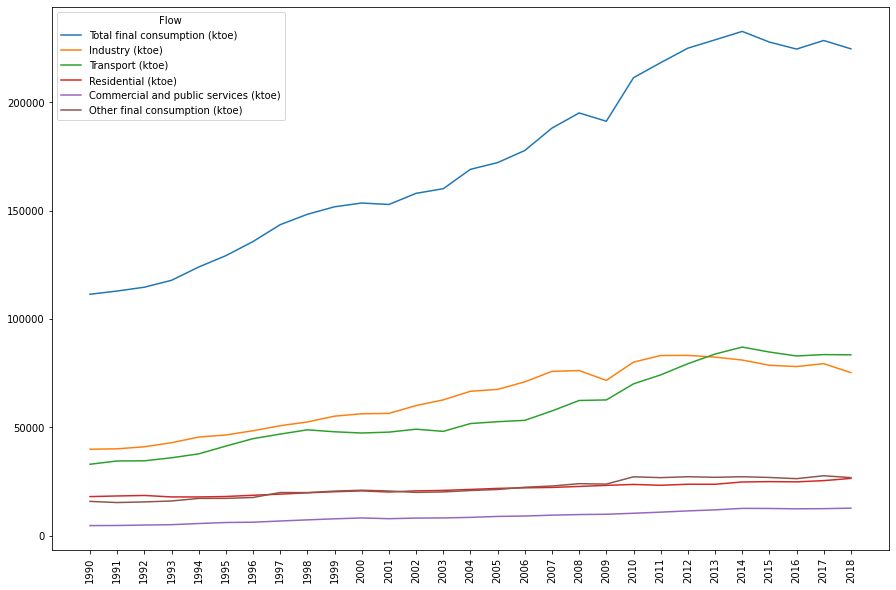

In [9]:
commanPlot(total)

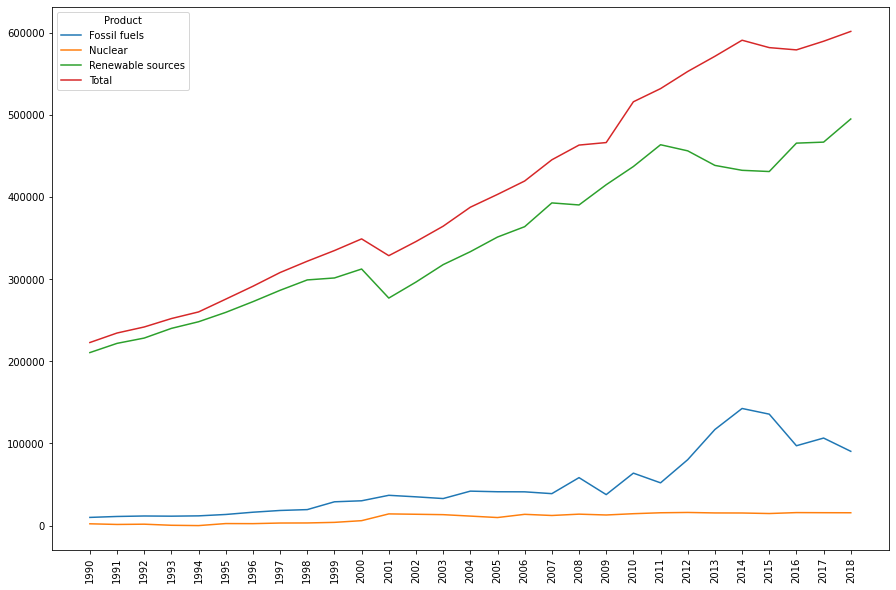

In [10]:
#produção energetica no brasil
eletric = br.xs('Electricity output (GWh)',level='Flow').transpose()
commanPlot(eletric)

In [11]:
renewable_br = br.loc[('Renewables and waste')]
renewable_br

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Flow,,,,,,,,,,,,,,,,,,,,,
Production (ktoe),65002.1367,66087.2773,65501.8893,65864.0677,69291.1687,68390.0230,69922.3527,73480.8248,73507.2564,74532.4023,...,110930.8941,118586.4067,115842.9204,116383.2885,117808.2989,118554.0858,120122.8868,122346.9480,123638.3460,129643.2400
Imports (ktoe),599.5830,556.7881,280.3517,743.4365,964.5863,1258.9895,680.1946,465.6494,94.0374,199.1872,...,0.6460,39.3912,600.9325,291.2863,68.0404,511.2926,431.5521,434.8372,974.8926,947.1150
Exports (ktoe),0.0000,0.0000,0.0000,-98.5686,-156.4170,-211.8413,-110.8807,-92.6906,-78.2805,-212.4553,...,-1714.7334,-983.5252,-1017.0953,-1601.8271,-1542.9669,-766.3987,-1107.3653,-935.4194,-728.4531,-883.4093
Total energy supply (ktoe),65538.4044,65936.4370,65779.7210,66669.8115,70051.2327,69430.8711,70425.2015,72924.5741,73640.0592,75195.8032,...,110127.2952,116836.6784,115265.8834,114847.2961,116083.9364,117427.5954,120353.4237,122005.3515,123638.7267,128864.0641
"Electricity, CHP and heat plants (ktoe)",-18516.2606,-19554.9155,-20160.3086,-21202.4218,-21934.8906,-22945.8297,-24195.6770,-25450.9554,-26554.4187,-26852.2069,...,-37970.2541,-40651.3709,-42957.6643,-42628.6439,-41575.0135,-41659.8869,-41748.6872,-44716.7055,-45029.2486,-47574.7881
"Oil refineries, transformation (ktoe)",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Total final consumption (ktoe),33667.5696,33046.0912,33176.0441,33051.9957,34952.0486,34129.0042,34198.6923,34634.6122,35752.6425,37497.7546,...,55718.7210,59329.1895,57227.9577,57271.1671,58224.3966,59357.0633,61858.4791,61782.0712,63237.6012,63403.8898
Industry (ktoe),16852.4224,16106.5105,16599.9386,17302.9251,19041.8894,18674.9638,18629.6645,19254.3472,20443.1214,22001.6473,...,31563.1164,34404.0078,34498.9408,35247.6437,34655.9543,33804.1012,33014.2212,34967.3672,35125.3984,31818.5175
Transport (ktoe),5857.6029,6105.7023,5972.9282,6228.3945,6643.7911,6869.2421,7151.8429,6910.0551,6782.9739,6798.4531,...,13156.2329,14065.6267,12415.9948,11685.5502,13765.6391,15142.5077,17922.8905,16351.5261,16602.2600,19191.3227


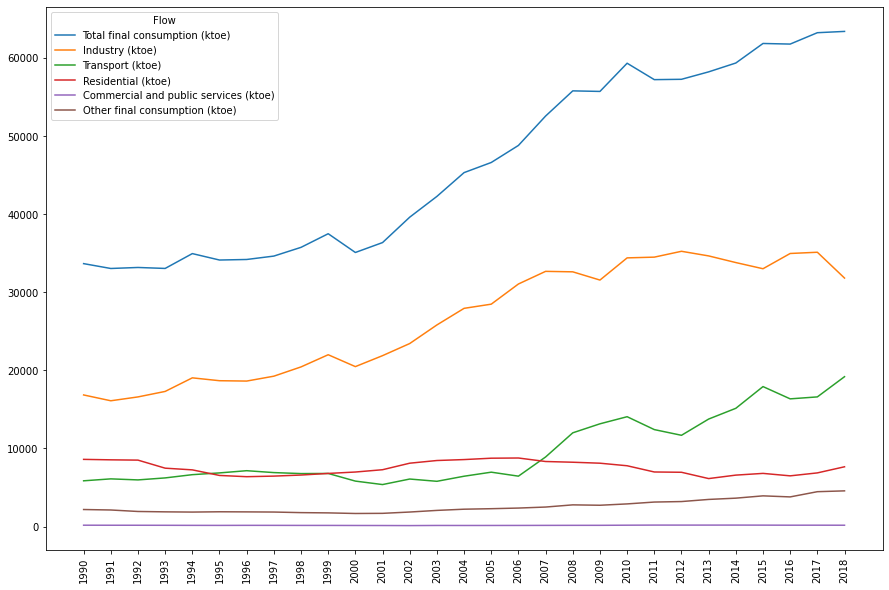

In [12]:
#consumo de energias renovaveis no brasil
renewable_br_prod = renewable_br.iloc[6:12].transpose()
commanPlot(renewable_br_prod)

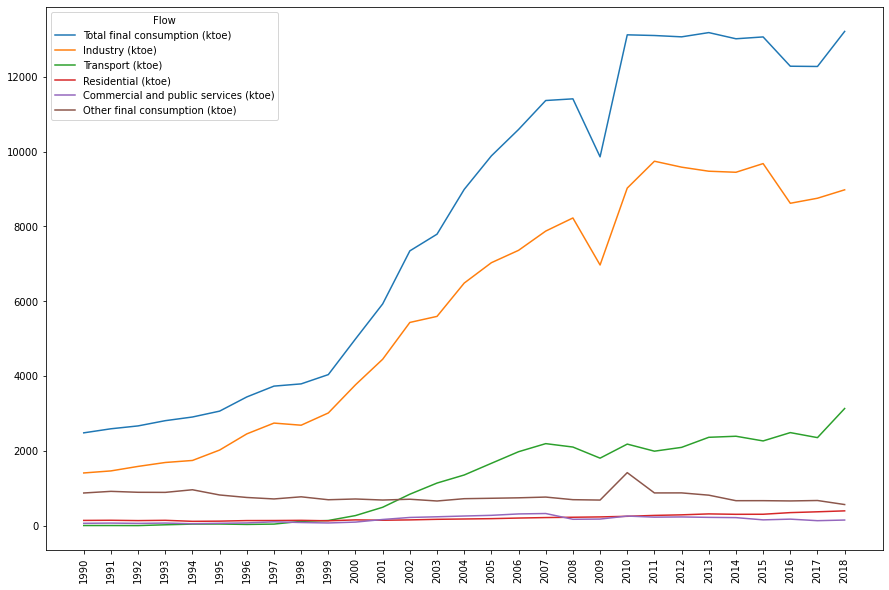

In [13]:
#consumo de gas natural no brasil
total_br_prod = br.loc[('Natural gas')].iloc[6:12].transpose()
commanPlot(total_br_prod)

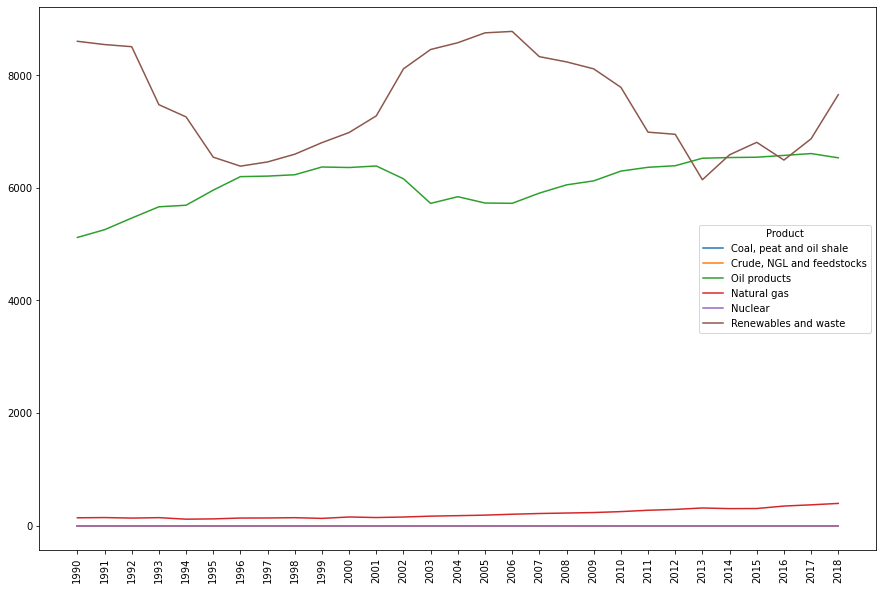

In [14]:
#consumo residencial no brasil
residential = br.xs('Residential (ktoe)',level='Flow').iloc[0:6].transpose()
commanPlot(residential)

In [15]:
world = df.loc[('World')]
world.to_csv('world.csv')

In [16]:
total_wrld:pd.DataFrame = world.loc[('Total')].iloc[6:12].transpose()

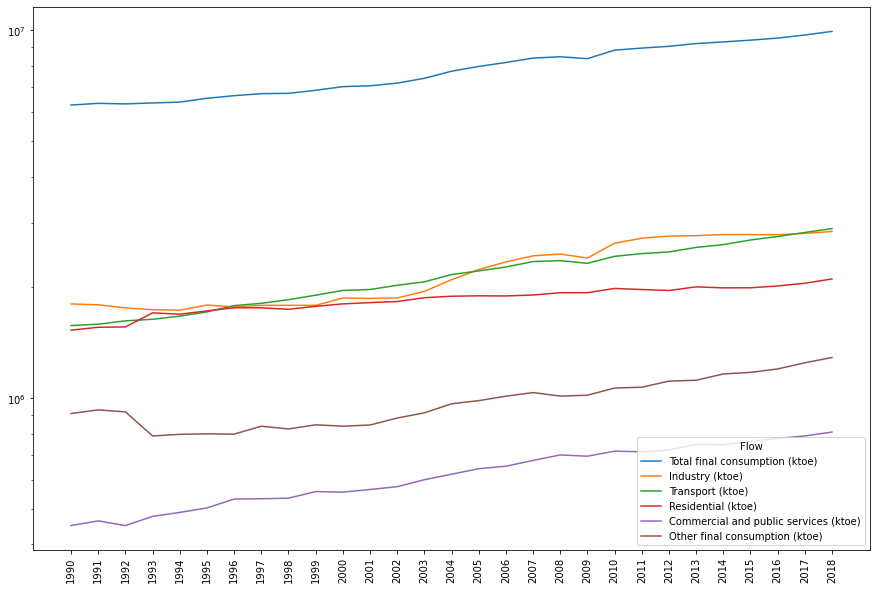

In [17]:
#consumo total no mundo inteiro
total_wrld.plot(figsize=(15,10))
plt.xticks(years)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

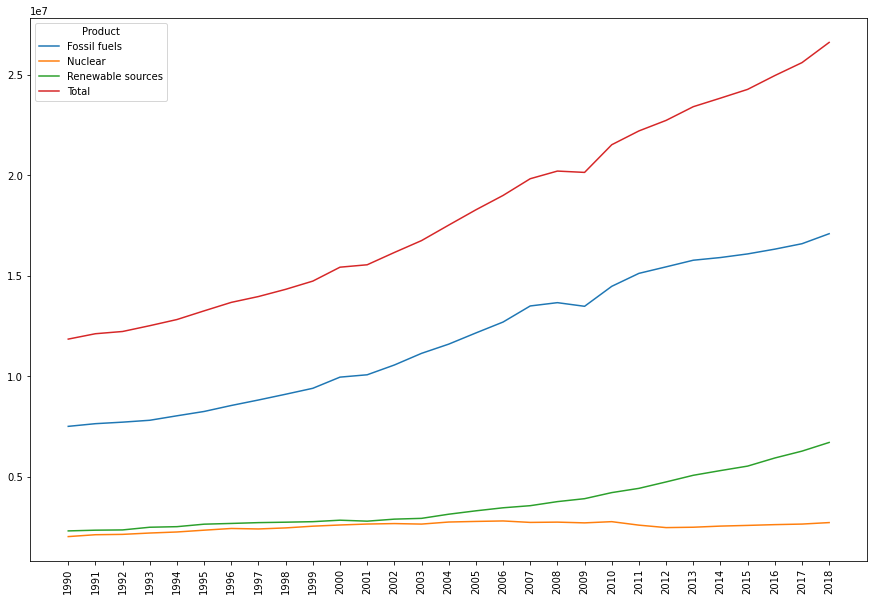

In [18]:
#Comparação de produção de energia mundial
eletric_wrld = world.xs('Electricity output (GWh)',level='Flow').transpose()
commanPlot(eletric_wrld)

<AxesSubplot:xlabel='Product'>

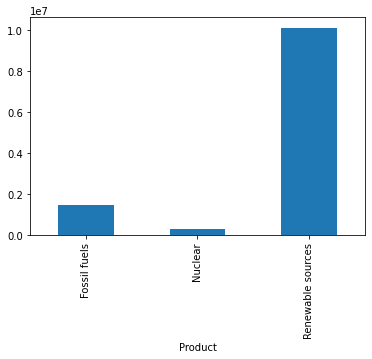

In [19]:
#Comparaçao da producao de energia no brasil desde 1990
eletricity_output = df.xs('Electricity output (GWh)',level='Flow')
eletricity_output_nototal = eletricity_output[eletricity_output.index.get_level_values('Product') != 'Total']
eletricity_output_br  = eletricity_output_nototal.loc[('Brazil')]
eletricity_output_br.transpose().sum().plot.bar()

<AxesSubplot:xlabel='Country'>

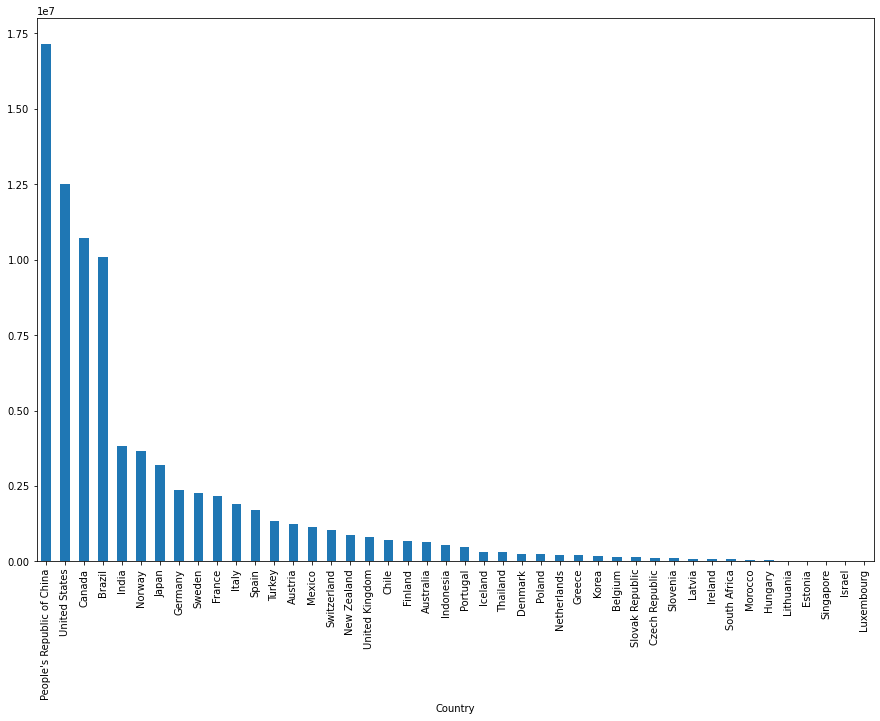

In [20]:
#maiores produtores de energias renovaveis desde 1990
eletricity_output_renew = eletricity_output.xs('Renewable sources',level='Product')
eletricity_output_renew.filter(items=countries, axis=0).transpose().sum().sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

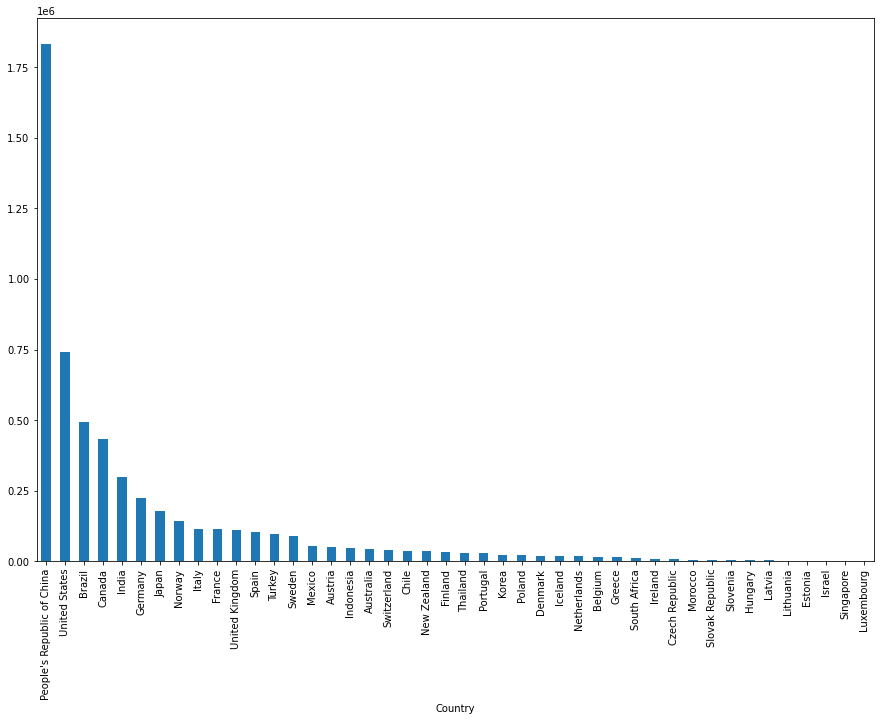

In [21]:
#maiores produtores em 2018
eletricity_output_renew.filter(items=countries, axis=0)[2018].transpose().sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

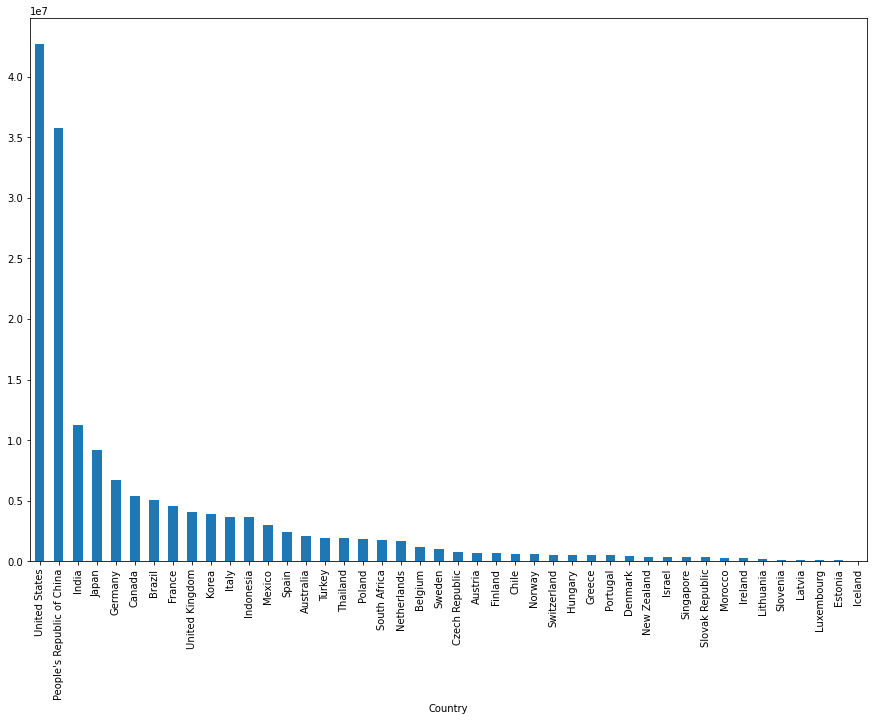

In [22]:
#maiores consumidores de energia no total
all_total = df.xs('Total', level = 'Product')
all_total_consuption = all_total.xs('Total final consumption (ktoe)', level = 'Flow')
all_total_consuption.filter(items=countries, axis=0).transpose().sum().sort_values(ascending = False).plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Country'>

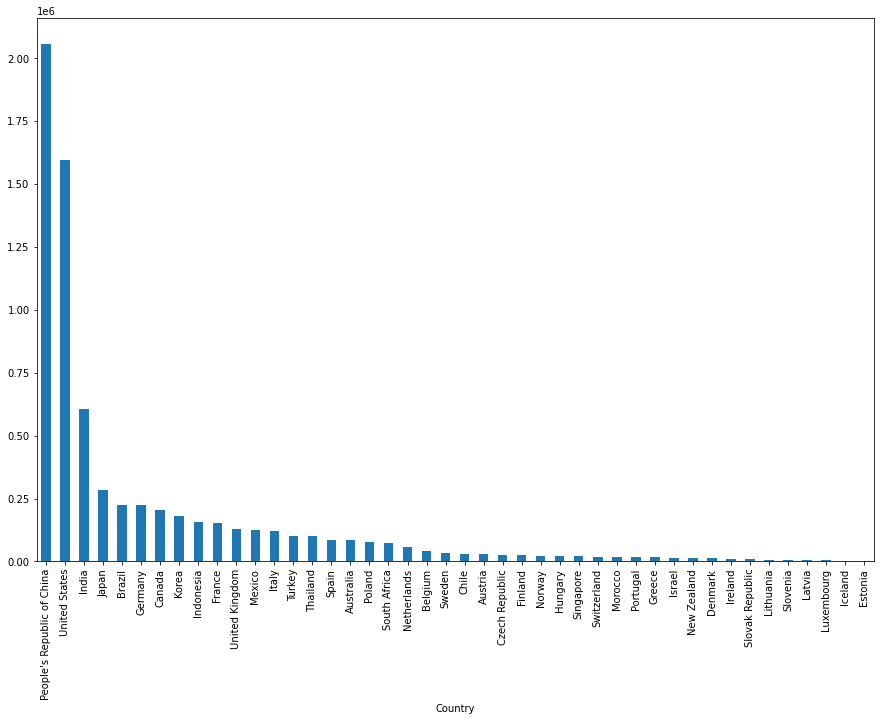

In [23]:
#maiores consumidores em 2018
all_total_consuption.filter(items=countries, axis=0)[2018].transpose().sort_values(ascending = False).plot.bar(figsize=(15,10))

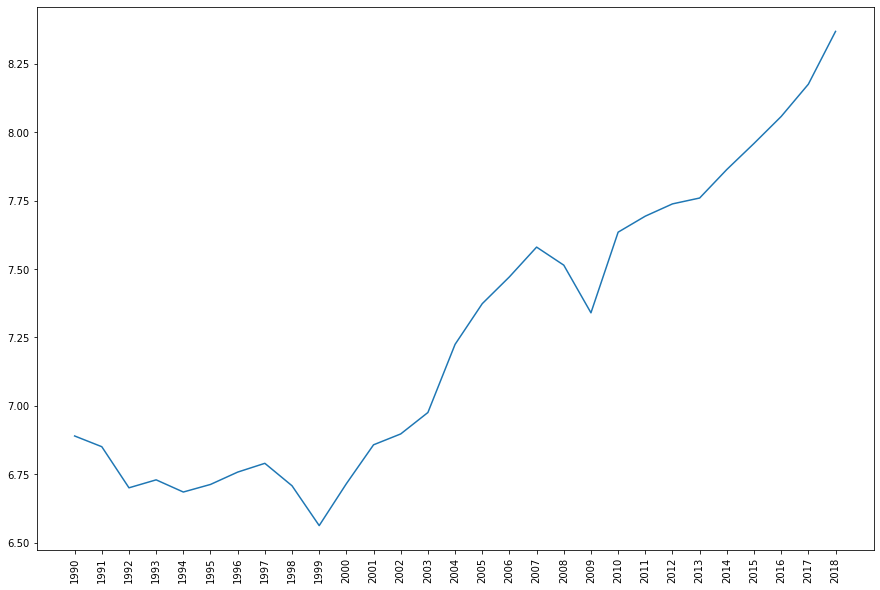

In [24]:
#crescimento do uso de energias não renovaveis em sob as energias renovaveis
all_consuption = df.xs('Total final consumption (ktoe)', level = 'Flow')
all_total_cons = all_consuption.xs('Total', level = 'Product')
all_renew_cons = all_consuption.xs('Renewables and waste', level = 'Product')
## all_total_renew_ratio é igual a todo consumo menos o consumo renovavel, divido pelo consumo renovavel, ou seja, todo consumo não renovavel divido pelo consumo renovavel, é a grandeza de vezes a qual o consumo nao renovavel é maior que o consumo renovavel.
all_total_renew_ratio = (all_total_cons - all_renew_cons) / all_renew_cons
commanPlot(all_total_renew_ratio.loc[('World')])

In [25]:
# africa é o unico continente que utiliza mais energia renovavel que não renovavel, mesmo que entre os dados existam varios paises
renovaveis2018 = all_total_renew_ratio[all_total_renew_ratio[2018] <= 1]
renovaveis2018

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Africa,0.728063,0.723668,0.718427,0.709251,0.668029,0.687281,0.711117,0.733703,0.719112,0.722521,...,0.869881,0.870838,0.857727,0.895907,0.910185,0.930783,0.919365,0.920757,0.936484,0.972752


In [26]:
all_total_renew_ratio

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Australia,15.992328,16.000755,17.830802,14.997279,15.841032,15.570118,13.953303,13.644754,14.318433,14.623449,...,18.740715,16.290946,17.145939,17.252486,16.355514,17.123888,16.206977,16.727406,16.514312,17.628138
Austria,7.979980,7.883301,7.931155,8.132173,8.559228,8.229120,8.507497,8.582144,9.078451,7.903193,...,5.879735,5.578906,5.540935,5.449325,5.423989,5.459120,5.379187,5.491846,5.548266,5.852613
Belgium,84.391464,85.823812,85.023486,102.885518,105.112601,86.298592,91.099135,92.638868,84.369600,75.062088,...,29.964881,24.427034,23.352688,21.597644,20.715210,20.498797,21.972490,19.073622,19.211782,18.976915
Canada,15.001876,14.939998,15.303341,15.737199,14.320196,14.104489,15.639199,16.233229,14.867678,14.821899,...,15.740528,16.062318,16.364412,16.296978,15.646689,15.012334,15.320303,17.242708,17.099630,17.851223
Chile,3.039086,2.861662,2.963063,3.394351,3.472890,3.520461,3.652467,4.255040,4.025569,4.086812,...,3.981456,4.570113,3.973722,3.630555,3.546485,5.147398,5.759476,6.053937,6.225036,5.919946
Czech Republic,30.691335,26.815015,17.710169,18.322659,18.829828,23.056114,23.268329,21.240549,19.621953,18.933910,...,10.584755,10.140083,9.242031,8.867091,8.274750,7.728671,7.608679,7.350395,7.962076,7.635133
Denmark,22.273800,22.230437,21.546433,21.749240,22.651965,23.399180,24.054134,23.057062,24.779263,23.757936,...,10.859226,10.613455,9.936351,9.515801,9.279604,9.046917,8.041831,7.968509,7.812762,7.652209
Estonia,29.186633,27.591630,18.205848,15.616623,13.273671,8.583870,4.785860,4.838200,5.804210,5.015834,...,4.502462,4.304709,4.688100,5.017182,4.598940,4.714135,4.699719,5.693040,5.557296,5.347780
Finland,5.337921,5.873259,5.793835,5.226140,5.214795,4.673630,4.599797,4.291497,4.314965,4.277994,...,4.549318,4.372550,4.207987,4.030487,4.006208,3.572003,3.499462,3.673659,3.348427,3.275221


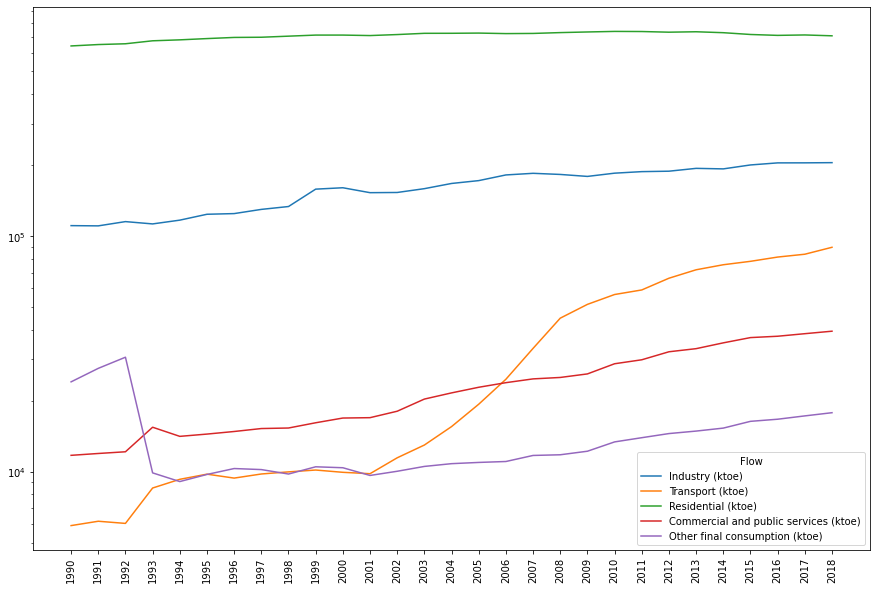

In [27]:
#quais setores a energia renovavel cresceu
world.loc[('Renewables and waste')].iloc[7:].transpose().plot(figsize=(15,10))
plt.xticks(years)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

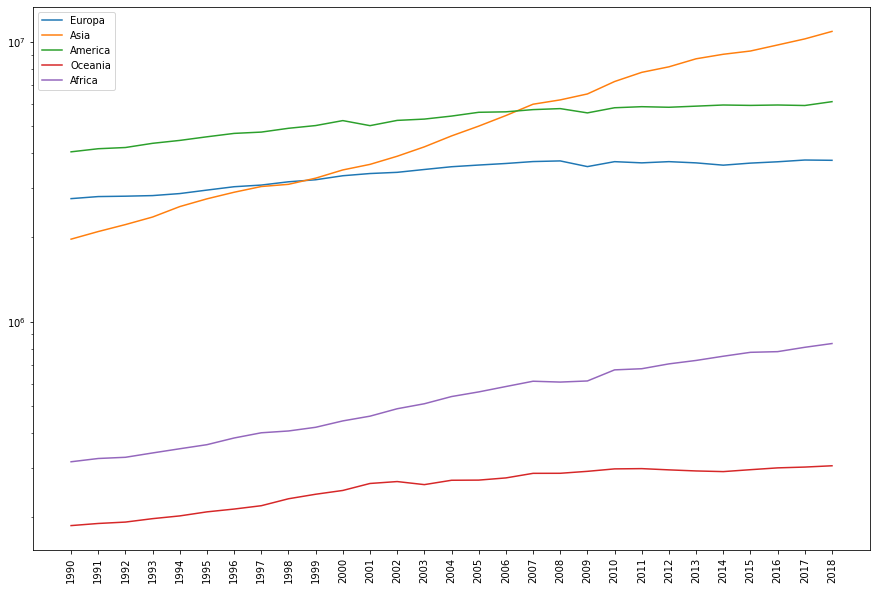

In [28]:
#crescimento da produção total ao longo dos anos por regioẽs
regions_prod = eletricity_output.xs('Total', level = 'Product')
europe = regions_prod.filter(items=europa, axis=0).sum()
asia_prod = regions_prod.filter(items=asia, axis=0).sum()
america_prod = regions_prod.filter(items=america, axis=0).sum()
oceania_prod = regions_prod.filter(items=oceania, axis=0).sum()
africa_prod = eletricity_output.loc[('Africa', 'Total')]
plt.figure(figsize=(15,10))
europe.plot()
asia_prod.plot()
america_prod.plot()
oceania_prod.plot()
africa_prod.plot()
plt.xticks(years)
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(['Europa','Asia', 'America', 'Oceania', 'Africa'])
plt.show()

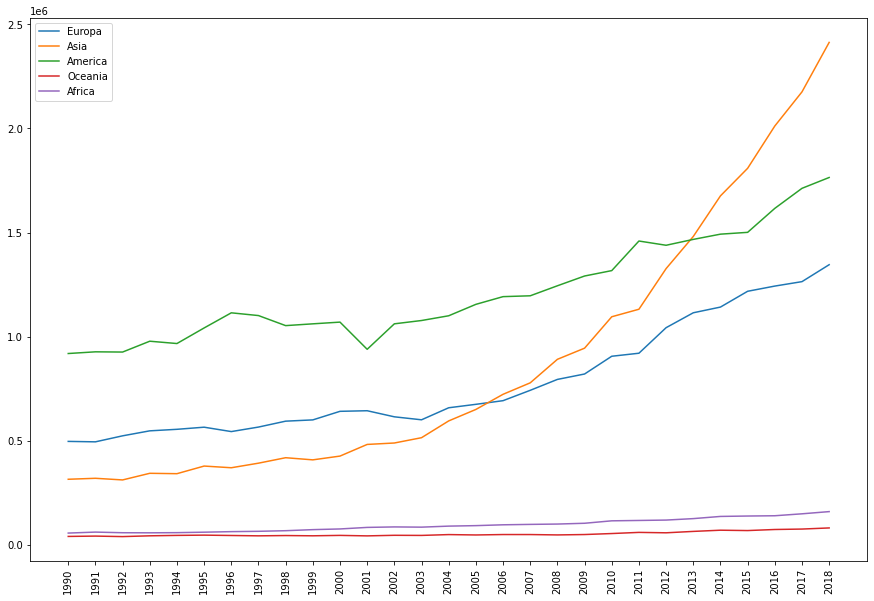

In [29]:
#crescimento da produção de energia renovavel ao longo dos anos por regioẽs
regions_renew = eletricity_output.xs('Renewable sources', level = 'Product')
europe_renew = regions_renew.filter(items=europa, axis=0).sum()
asia_renew = regions_renew.filter(items=asia, axis=0).sum()
america_renew = regions_renew.filter(items=america, axis=0).sum()
oceania_renew = regions_renew.filter(items=oceania, axis=0).sum()
africa_renew = eletricity_output.loc[('Africa', 'Renewable sources')]
plt.figure(figsize=(15,10))
europe_renew.plot()
asia_renew.plot()
america_renew.plot()
oceania_renew.plot()
africa_renew.plot()
plt.legend(['Europa','Asia', 'America', 'Oceania', 'Africa'])
plt.xticks(years)
plt.xticks(rotation=90)
plt.show()